In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import glob
import nltk

import itertools
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import chart_studio.plotly as py
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import gensim.models.word2vec as w2v
from sklearn.manifold import TSNE
import plotly.express as px

from collections import defaultdict
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette
from fastcluster import linkage
from matplotlib.colors import rgb2hex, colorConverter

In [4]:
all_files=glob.glob("/Users/tanyachauhan/Documents/Diksha_All_Csv/"+"/*.csv")
dflist = []


In [5]:
for filename in all_files:
    # Dataframe of one file
    df_sm = pd.read_csv(filename, index_col=None, header=0)
    dflist.append(df_sm)
    
df = pd.concat(dflist, axis=0, ignore_index=True)


In [6]:
df.dropna(subset=["Review Text"],inplace=True)


In [7]:
df

Package Name  App Version Code App Version Name Reviewer Language  \
2      in.gov.diksha.app               NaN              NaN                en   
7      in.gov.diksha.app              51.0          2.5.183                en   
8      in.gov.diksha.app              51.0          2.5.183                en   
11     in.gov.diksha.app              51.0          2.5.183                hi   
12     in.gov.diksha.app              51.0          2.5.183                en   
...                  ...               ...              ...               ...   
24748  in.gov.diksha.app               NaN              NaN                en   
24749  in.gov.diksha.app              44.0          2.3.133                en   
24750  in.gov.diksha.app              44.0          2.3.133                en   
24751  in.gov.diksha.app              38.0          2.1.109                en   
24752  in.gov.diksha.app              44.0          2.3.133                en   

               Device Review Submit Date and Time  \
2         vivaltods5m        2020-01-01T03:16:15Z   
7              violet        2020-01-01T07:23:49Z   
8                1902        2020-01-01T07:33:23Z   
11                Z50        2020-01-01T09:37:13Z   
12            CPH1859        2020-01-01T09:37:46Z   
...               ...                         ...   
24748            riva        2019-09-30T17:11:10Z   
24749      TECNO-ID3k        2019-09-30T17:13:02Z   
24750         santoni        2019-09-30T17:17:35Z   
24751  GIONEE_WBL7519        2019-09-30T17:39:16Z   
24752          oxygen        2019-09-30T18:14:41Z   

       Review Submit Millis Since Epoch Review Last Update Date and Time  \
2                         1577848575284             2020-01-01T03:16:15Z   
7                         1577863429433             2020-01-01T07:23:49Z   
8                         1577864003055             2020-01-01T07:33:23Z   
11                        1577871433991             2020-01-01T09:37:13Z   
12                        1577871466601             2020-01-01T09:37:46Z   
...                                 ...                              ...   
24748                     1569863470077             2019-09-30T17:11:10Z   
24749                     1569863582573             2019-09-30T17:13:02Z   
24750                     1569863855829             2019-09-30T17:17:35Z   
24751                     1569865156577             2019-09-30T17:39:16Z   
24752                     1569867281752             2019-09-30T18:14:41Z   

       Review Last Update Millis Since Epoch  Star Rating  Review Title  \
2                              1577848575284            3           NaN   
7                              1577863429433            3           NaN   
8                              1577864003055            5           NaN   
11                             1577871433991            5           NaN   
12                             1577871466601            5           NaN   
...                                      ...          ...           ...   
24748                          1569863470077            3           NaN   
24749                          1569863582573            4           NaN   
24750                          1569863855829            5           NaN   
24751                          1569865156577            5           NaN   
24752                          1569867281752            5           NaN   

                                             Review Text  \
2                                      good but not much   
7                                       Good application   
8                                       Nice explanation   
11                                              Nice app   
12                                   Best app 4 students   
...                                                  ...   
24748                                  Sadanand Kushwaha   
24749  I am a student . It is very good app but its p...   
24750                                           

In [8]:
eng_data = df.loc[df['Reviewer Language']=='en']
eng_df = pd.DataFrame(eng_data)
# eng_df

In [9]:
eng_df.reset_index(inplace = True) 


In [10]:
eng_df 


index       Package Name  App Version Code App Version Name  \
0          2  in.gov.diksha.app               NaN              NaN   
1          7  in.gov.diksha.app              51.0          2.5.183   
2          8  in.gov.diksha.app              51.0          2.5.183   
3         12  in.gov.diksha.app              51.0          2.5.183   
4         15  in.gov.diksha.app               NaN              NaN   
...      ...                ...               ...              ...   
11849  24748  in.gov.diksha.app               NaN              NaN   
11850  24749  in.gov.diksha.app              44.0          2.3.133   
11851  24750  in.gov.diksha.app              44.0          2.3.133   
11852  24751  in.gov.diksha.app              38.0          2.1.109   
11853  24752  in.gov.diksha.app              44.0          2.3.133   

      Reviewer Language          Device Review Submit Date and Time  \
0                    en     vivaltods5m        2020-01-01T03:16:15Z   
1                    en          violet        2020-01-01T07:23:49Z   
2                    en            1902        2020-01-01T07:33:23Z   
3                    en         CPH1859        2020-01-01T09:37:46Z   
4                    en           G2199        2020-01-01T10:40:39Z   
...                 ...             ...                         ...   
11849                en            riva        2019-09-30T17:11:10Z   
11850                en      TECNO-ID3k        2019-09-30T17:13:02Z   
11851                en         santoni        2019-09-30T17:17:35Z   
11852                en  GIONEE_WBL7519        2019-09-30T17:39:16Z   
11853                en          oxygen        2019-09-30T18:14:41Z   

       Review Submit Millis Since Epoch Review Last Update Date and Time  \
0                         1577848575284             2020-01-01T03:16:15Z   
1                         1577863429433             2020-01-01T07:23:49Z   
2                         1577864003055             2020-01-01T07:33:23Z   
3                         1577871466601             2020-01-01T09:37:46Z   
4                         1577875239740             2020-01-01T10:40:39Z   
...                                 ...                              ...   
11849                     1569863470077             2019-09-30T17:11:10Z   
11850                     1569863582573             2019-09-30T17:13:02Z   
11851                     1569863855829             2019-09-30T17:17:35Z   
11852                     1569865156577             2019-09-30T17:39:16Z   
11853                     1569867281752             2019-09-30T18:14:41Z   

       Review Last Update Millis Since Epoch  Star Rating  Review Title  \
0                              1577848575284            3           NaN   
1                              1577863429433            3           NaN   
2                              1577864003055            5           NaN   
3                              1577871466601            5           NaN   
4                              1577875239740            2           NaN   
...                                      ...          ...           ...   
11849                          1569863470077            3           NaN   
11850                          1569863582573            4           NaN   
11851                          1569863855829            5           NaN   
11852                          1569865156577            5           NaN   
11853                          1569867281752            5           NaN   

                                             Review Text  \
0                                      good but not much   
1                                       Good application   
2                                       Nice explanation   
3                                    Best app 4 students   
4                                                     ok   
...                                                  ...   
11849                                  Sadanand Kushwaha   
11850  I am a stude

In [99]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
import re

def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
       # The yield statement suspends function’s execution and sends a value back to the caller.
        yield subtree.leaves()

def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
                    and word.lower() not in stopwords)
    return accepted

def get_terms(tree):

    for leaf in leaves(tree):
        term = [ w for w,t in leaf if acceptable_word(w) ]
        yield term


In [12]:
grammar =r"""
  NP: {<DT|JJ|NN.*>+}          
  PP: {<IN><NP>}            
  VP: {<VB.*><NP|PP|CLAUSE>+$}
  CLAUSE: {<NP><VP>}          
  """
      
    

In [13]:
def phrase_extraction(text, grammar):
    text = text.lower()
    sentence_re = r'''(?x)          
      (?:[A-Z]\.)+        
    | \w+(?:-\w+)*        
    | \$?\d+(?:\.\d+)?%?  
    | \.\.\.              
    | [][.,;"'?():_`-]    
    '''
    
    ls = [] 
    word_token_ls = text.split(" ")

    toks = nltk.regexp_tokenize(text, sentence_re)
    postoks = nltk.tag.pos_tag(toks)
    
    chunker = nltk.RegexpParser(grammar)
    
    tree = chunker.parse(postoks)
    terms = get_terms(tree)
    for term in terms:
        ls.append(" ".join(term)) 
    return list(set(ls))



In [14]:
ls= list(eng_df["Review Text"])


In [15]:
out = map(lambda x:x.lower(), ls)  
review_text_lower = list(out)
review_text_lower

['good but not much',
 'good application',
 'nice explanation',
 'best app 4 students',
 'ok',
 'excellent',
 'ok',
 'this app very usefull for students and teachers',
 'good',
 'wow amazing',
 'not working on mobile even its android 7.3',
 'very very bad app👿👿😡😡😠😠😤😤',
 'easy to learn',
 'excellent',
 'very good app. i am a secondary school teacher, & i notice dixa doing smart work.... i would like to do my little contribute...',
 'it is very useful',
 'this is very importent for studes',
 'excellent',
 'unique',
 'it is a good app for leaning',
 'it is very helpful to us',
 'super teaching',
 'how to use it all book are in marathi or gujarat l had all in english language please',
 '👌👌',
 'good application',
 'informative app with loads of learning materials specially for teachers who wants to enhance their knowledge.',
 'very good app',
 'this app is a great help to learn maths.it is extraordinary.',
 'the app is very useful to you and all students',
 'this app very helpful for studen

In [16]:
# Numbers removing

import re
review_text_lower_wdoutno = list(map(lambda x: re.sub(r'\d+', '', x), review_text_lower)) 
review_text_lower_wdoutno


['good but not much',
 'good application',
 'nice explanation',
 'best app  students',
 'ok',
 'excellent',
 'ok',
 'this app very usefull for students and teachers',
 'good',
 'wow amazing',
 'not working on mobile even its android .',
 'very very bad app👿👿😡😡😠😠😤😤',
 'easy to learn',
 'excellent',
 'very good app. i am a secondary school teacher, & i notice dixa doing smart work.... i would like to do my little contribute...',
 'it is very useful',
 'this is very importent for studes',
 'excellent',
 'unique',
 'it is a good app for leaning',
 'it is very helpful to us',
 'super teaching',
 'how to use it all book are in marathi or gujarat l had all in english language please',
 '👌👌',
 'good application',
 'informative app with loads of learning materials specially for teachers who wants to enhance their knowledge.',
 'very good app',
 'this app is a great help to learn maths.it is extraordinary.',
 'the app is very useful to you and all students',
 'this app very helpful for students 

In [17]:
# Remove punctuation
import string
def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

review_text_wdout_punct = []
for i in review_text_lower_wdoutno:
    x = remove_punctuation(i)
    review_text_wdout_punct.append(x)
review_text_wdout_punct   


['good but not much',
 'good application',
 'nice explanation',
 'best app  students',
 'ok',
 'excellent',
 'ok',
 'this app very usefull for students and teachers',
 'good',
 'wow amazing',
 'not working on mobile even its android ',
 'very very bad app👿👿😡😡😠😠😤😤',
 'easy to learn',
 'excellent',
 'very good app i am a secondary school teacher  i notice dixa doing smart work i would like to do my little contribute',
 'it is very useful',
 'this is very importent for studes',
 'excellent',
 'unique',
 'it is a good app for leaning',
 'it is very helpful to us',
 'super teaching',
 'how to use it all book are in marathi or gujarat l had all in english language please',
 '👌👌',
 'good application',
 'informative app with loads of learning materials specially for teachers who wants to enhance their knowledge',
 'very good app',
 'this app is a great help to learn mathsit is extraordinary',
 'the app is very useful to you and all students',
 'this app very helpful for students and teachers',

In [18]:
# remove whitespace from text 
def remove_whitespace(text): 
    return " ".join(text.split()) 

review_text_wdout_whitespace = []
for i in review_text_wdout_punct:
    x = remove_whitespace(i)
    review_text_wdout_whitespace.append(x)
review_text_wdout_whitespace  


['good but not much',
 'good application',
 'nice explanation',
 'best app students',
 'ok',
 'excellent',
 'ok',
 'this app very usefull for students and teachers',
 'good',
 'wow amazing',
 'not working on mobile even its android',
 'very very bad app👿👿😡😡😠😠😤😤',
 'easy to learn',
 'excellent',
 'very good app i am a secondary school teacher i notice dixa doing smart work i would like to do my little contribute',
 'it is very useful',
 'this is very importent for studes',
 'excellent',
 'unique',
 'it is a good app for leaning',
 'it is very helpful to us',
 'super teaching',
 'how to use it all book are in marathi or gujarat l had all in english language please',
 '👌👌',
 'good application',
 'informative app with loads of learning materials specially for teachers who wants to enhance their knowledge',
 'very good app',
 'this app is a great help to learn mathsit is extraordinary',
 'the app is very useful to you and all students',
 'this app very helpful for students and teachers',
 '

In [19]:
# convert a list to string    
def listToString(s):  
    str1 = ""   
    for ele in s:  
        str1 += ele   
        str1 += ' '
    return str1  
        

In [20]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = list(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 
  
review_text_wdout_stopwords = []
for i in review_text_wdout_whitespace:
    x = remove_stopwords(i)
    y = listToString(x)
    review_text_wdout_stopwords.append(y)
review_text_wdout_stopwords  

['good much ',
 'good application ',
 'nice explanation ',
 'best app students ',
 'ok ',
 'excellent ',
 'ok ',
 'app usefull students teachers ',
 'good ',
 'wow amazing ',
 'working mobile even android ',
 'bad app👿👿😡😡😠😠😤😤 ',
 'easy learn ',
 'excellent ',
 'good app secondary school teacher notice dixa smart work would like little contribute ',
 'useful ',
 'importent studes ',
 'excellent ',
 'unique ',
 'good app leaning ',
 'helpful us ',
 'super teaching ',
 'use book marathi gujarat l english language please ',
 '👌👌 ',
 'good application ',
 'informative app loads learning materials specially teachers wants enhance knowledge ',
 'good app ',
 'app great help learn mathsit extraordinary ',
 'app useful students ',
 'app helpful students teachers ',
 'useful learning every one ',
 'good aap understand much 😕😒👽 ',
 'use full ',
 'cant able see video scanned qr code many times video displaying ',
 'excellent app teachers students ',
 'tried child st standard ssc board contents ful

In [21]:
# remove emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

review_text_wdout_emojis = []
for i in review_text_wdout_stopwords:
    x = deEmojify(i)
    review_text_wdout_emojis.append(x)
review_text_wdout_emojis  

['good much ',
 'good application ',
 'nice explanation ',
 'best app students ',
 'ok ',
 'excellent ',
 'ok ',
 'app usefull students teachers ',
 'good ',
 'wow amazing ',
 'working mobile even android ',
 'bad app ',
 'easy learn ',
 'excellent ',
 'good app secondary school teacher notice dixa smart work would like little contribute ',
 'useful ',
 'importent studes ',
 'excellent ',
 'unique ',
 'good app leaning ',
 'helpful us ',
 'super teaching ',
 'use book marathi gujarat l english language please ',
 ' ',
 'good application ',
 'informative app loads learning materials specially teachers wants enhance knowledge ',
 'good app ',
 'app great help learn mathsit extraordinary ',
 'app useful students ',
 'app helpful students teachers ',
 'useful learning every one ',
 'good aap understand much  ',
 'use full ',
 'cant able see video scanned qr code many times video displaying ',
 'excellent app teachers students ',
 'tried child st standard ssc board contents fully available 

In [22]:
# lemmatization
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 

# lemmatize string 
def lemmatize_word(text): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return lemmas 
  
review_text_lemmas = []
for i in review_text_wdout_emojis:
    x = lemmatize_word(i)
    y = listToString(x)
    review_text_lemmas.append(y)
review_text_lemmas  

['good much ',
 'good application ',
 'nice explanation ',
 'best app students ',
 'ok ',
 'excellent ',
 'ok ',
 'app usefull students teachers ',
 'good ',
 'wow amaze ',
 'work mobile even android ',
 'bad app ',
 'easy learn ',
 'excellent ',
 'good app secondary school teacher notice dixa smart work would like little contribute ',
 'useful ',
 'importent stud ',
 'excellent ',
 'unique ',
 'good app lean ',
 'helpful us ',
 'super teach ',
 'use book marathi gujarat l english language please ',
 '',
 'good application ',
 'informative app load learn materials specially teachers want enhance knowledge ',
 'good app ',
 'app great help learn mathsit extraordinary ',
 'app useful students ',
 'app helpful students teachers ',
 'useful learn every one ',
 'good aap understand much ',
 'use full ',
 'cant able see video scan qr code many time video display ',
 'excellent app teachers students ',
 'try child st standard ssc board content fully available poetry songs app text book differ

In [23]:
# remove review text containing less than 3 words using regex (findall()) 

import re 

processed_review_text = []
for i in review_text_lemmas:
    res = len(re.findall(r'\w+', i)) 
    if(res>=3):
        processed_review_text.append(i)
        
processed_review_text    

['best app students ',
 'app usefull students teachers ',
 'work mobile even android ',
 'good app secondary school teacher notice dixa smart work would like little contribute ',
 'good app lean ',
 'use book marathi gujarat l english language please ',
 'informative app load learn materials specially teachers want enhance knowledge ',
 'app great help learn mathsit extraordinary ',
 'app useful students ',
 'app helpful students teachers ',
 'useful learn every one ',
 'good aap understand much ',
 'cant able see video scan qr code many time video display ',
 'excellent app teachers students ',
 'try child st standard ssc board content fully available poetry songs app text book different interactive level require effective ',
 'studentcontent come sad ',
 'helfull teacher students ',
 'hi sir use old versions android mobile support please update ',
 'imp useful app ',
 'know reason content standard need ',
 'good interest helpful app free help teach lesson ',
 'truly helpful better st

In [24]:
# Vectorization

def vectorization_of_list(input_list):
    #word embedding(vectorization)
    embed = hub.Module("/Users/tanyachauhan/Downloads/3")
    tf.logging.set_verbosity(tf.logging.ERROR)
    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        message_embeddings = session.run(embed(input_list))
#         print(message_embeddings)
        lst = []
        for i in message_embeddings:
            df = pd.DataFrame([i])
            lst.append(df)
    frame = pd.concat(lst)
    return frame

In [25]:
vectorized_review_frame = vectorization_of_list(processed_review_text)
vectorized_review_frame

0         1         2         3         4         5         6    \
0   0.014989 -0.054360  0.044410 -0.013166 -0.078643  0.012875  0.020251   
0   0.014371 -0.028846  0.044812 -0.009669 -0.067728  0.013394  0.009333   
0   0.011090 -0.047363  0.073098 -0.022431 -0.034471  0.003516  0.065954   
0   0.021578 -0.004523  0.026648  0.006459 -0.074257 -0.050447 -0.022495   
0  -0.006026  0.009414 -0.046563 -0.027482 -0.018227 -0.014290  0.085160   
..       ...       ...       ...       ...       ...       ...       ...   
0   0.013094 -0.011124  0.028710 -0.003136 -0.033803 -0.014707  0.032590   
0   0.033896 -0.034740 -0.022136 -0.064314 -0.046638  0.061058  0.001692   
0   0.008500  0.030200  0.049134 -0.025467 -0.085026 -0.017218  0.055356   
0   0.019529  0.019542  0.018748  0.008598  0.028014  0.028087  0.035552   
0   0.090570 -0.089828 -0.003916  0.096107 -0.038672 -0.046838 -0.047445   

         7         8         9    ...       502       503       504       505  \
0   0.066570 -0.014012 -0.029315  ... -0.115929 -0.056953  0.008988 -0.044505   
0   0.035425 -0.036611 -0.005325  ... -0.087885 -0.025638  0.006957 -0.075377   
0   0.020301 -0.045378  0.022051  ... -0.030737 -0.051063 -0.029952  0.011110   
0   0.000103 -0.034196  0.010375  ... -0.109561 -0.029006  0.015602 -0.019132   
0   0.046961 -0.049250  0.015450  ... -0.046057 -0.060354 -0.027073 -0.013925   
..       ...       ...       ...  ...       ...       ...       ...       ...   
0  -0.011652 -0.061524 -0.000224  ... -0.075251 -0.023764 -0.019472 -0.029827   
0  -0.034511 -0.087365  0.018782  ...  0.001034  0.082173  0.026416 -0.092130   
0   0.019804 -0.029367  0.008584  ... -0.121194 -0.015772 -0.009413 -0.044664   
0   0.040886 -0.036404 -0.027234  ... -0.095281 -0.046992 -0.019544 -0.016195   
0   0.052453 -0.069581  0.024323  ... -0.029159 -0.020254  0.053160 -0.030694   

         506       507       508       509       510       511  
0   0.008775  0.019881 -0.014857 -0.042894 -0.004678 -0.006225  
0   0.015189 -0.025097  0.025509 -0.057867  0.012289  0.042848  
0   0.003257  0.040687 -0.026417 -0.057769 -0.057126  0.003666  
0   0.021640  0.016368  0.044480 -0.061311  0.037686  0.050024  
0   0.032545 -0.014851 -0.031157 -0.054522  0.064729  0.021328  
..       ...       ...       ...       ...       ...       ...  
0  -0.042949  0.009757 -0.038272 -0.072789  0.048858  0.029099  
0  -0.000149 -0.001710 -0.048512  0.065872 -0.045558  0.072652  
0   0.001766 -0.003201 -0.037143 -0.022002 -0.015377  0.019788  
0   0.062742 -0.034503 -0.028392 -0.068943  0.026721 -0.035732  
0   0.047990  0.004968  0.025371  0.033610 -0.046944  0.086658  

[4423 rows x 512 columns]

In [26]:
prob=['poor video quality','download problem','content not available','scanning problem','video availability problem']
for i in range(len(prob)):
    prob[i]=prob[i].lower()
prob

['poor video quality',
 'download problem',
 'content not available',
 'scanning problem',
 'video availability problem']

In [67]:
def vectorization_of_list(input_list):
    #word embedding(vectorization)
    embed = hub.Module("/Users/tanyachauhan/Downloads/3")
    tf.logging.set_verbosity(tf.logging.ERROR)
    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        message_embeddings = session.run(embed(input_list))
#         print(message_embeddings)
        lst = []
        for i in message_embeddings:
            df = pd.DataFrame([i])
            lst.append(df)
    frame = pd.concat(lst)
    return frame

In [68]:
vectorized_a_frame = vectorization_of_list(prob)
vectorized_a_frame

0         1         2         3         4         5         6    \
0  0.054941 -0.003439  0.002779  0.078137  0.003661 -0.036477 -0.029678   
0  0.036763 -0.034779  0.022192  0.044057  0.000747  0.045358  0.089506   
0  0.009473 -0.059456 -0.042189  0.060656 -0.067813  0.033797 -0.002641   
0  0.066967  0.072401  0.024995  0.028659 -0.082440 -0.013143  0.017747   
0  0.024528  0.017158  0.017532  0.039413  0.019387  0.002880  0.051680   

        7         8         9    ...       502       503       504       505  \
0  0.096106 -0.034580  0.002663  ... -0.008415 -0.052776 -0.057675 -0.005002   
0  0.015394 -0.052619  0.059314  ...  0.012991  0.001333 -0.055092 -0.055369   
0  0.011808 -0.061607  0.028346  ... -0.005049  0.024843 -0.065299 -0.057686   
0  0.046939 -0.040680  0.021984  ...  0.011797 -0.019766 -0.036027 -0.066056   
0  0.084239 -0.036741  0.034808  ... -0.021380  0.019050 -0.039439 -0.031765   

        506       507       508       509       510       511  
0 -0.025055  0.070252 -0.026941 -0.065965  0.024125 -0.027194  
0 -0.009039  0.014461 -0.061095  0.010883 -0.015933  0.044640  
0 -0.066881  0.047134  0.005849 -0.035909 -0.073967  0.007783  
0 -0.017531  0.020583  0.000775  0.031952  0.013768 -0.057783  
0 -0.000461  0.000677 -0.065373 -0.017766 -0.042664  0.034182  

[5 rows x 512 columns]

In [70]:
vectorized_a_frame.index=prob    
vectorized_a_frame

0         1         2         3         4    \
poor video quality          0.054941 -0.003439  0.002779  0.078137  0.003661   
download problem            0.036763 -0.034779  0.022192  0.044057  0.000747   
content not available       0.009473 -0.059456 -0.042189  0.060656 -0.067813   
scanning problem            0.066967  0.072401  0.024995  0.028659 -0.082440   
video availability problem  0.024528  0.017158  0.017532  0.039413  0.019387   

                                 5         6         7         8         9    \
poor video quality         -0.036477 -0.029678  0.096106 -0.034580  0.002663   
download problem            0.045358  0.089506  0.015394 -0.052619  0.059314   
content not available       0.033797 -0.002641  0.011808 -0.061607  0.028346   
scanning problem           -0.013143  0.017747  0.046939 -0.040680  0.021984   
video availability problem  0.002880  0.051680  0.084239 -0.036741  0.034808   

                            ...       502       503       504       505  \
poor video quality          ... -0.008415 -0.052776 -0.057675 -0.005002   
download problem            ...  0.012991  0.001333 -0.055092 -0.055369   
content not available       ... -0.005049  0.024843 -0.065299 -0.057686   
scanning problem            ...  0.011797 -0.019766 -0.036027 -0.066056   
video availability problem  ... -0.021380  0.019050 -0.039439 -0.031765   

                                 506       507       508       509       510  \
poor video quality         -0.025055  0.070252 -0.026941 -0.065965  0.024125   
download problem           -0.009039  0.014461 -0.061095  0.010883 -0.015933   
content not available      -0.066881  0.047134  0.005849 -0.035909 -0.073967   
scanning problem           -0.017531  0.020583  0.000775  0.031952  0.013768   
video availability problem -0.000461  0.000677 -0.065373 -0.017766 -0.042664   

                                 511  
poor video quality         -0.027194  
download problem            0.044640  
content not available       0.007783  
scanning problem           -0.057783  
video availability problem  0.034182  

[5 rows x 512 columns]

In [28]:
# vectorized_review_frame.loc[0]

In [29]:
vectorized_review_frame.index=processed_review_text    


In [30]:
vectorized_review_frame

0         1    \
best app students                                   0.014989 -0.054360   
app usefull students teachers                       0.014371 -0.028846   
work mobile even android                            0.011090 -0.047363   
good app secondary school teacher notice dixa s...  0.021578 -0.004523   
good app lean                                      -0.006026  0.009414   
...                                                      ...       ...   
excellent app learn                                 0.013094 -0.011124   
teutos te ows                                       0.033896 -0.034740   
experience good learn app                           0.008500  0.030200   
student good app picture sound qualty dullsople...  0.019529  0.019542   
thank indian government                             0.090570 -0.089828   

                                                         2         3    \
best app students                                   0.044410 -0.013166   
app usefull students teachers                       0.044812 -0.009669   
work mobile even android                            0.073098 -0.022431   
good app secondary school teacher notice dixa s...  0.026648  0.006459   
good app lean                                      -0.046563 -0.027482   
...                                                      ...       ...   
excellent app learn                                 0.028710 -0.003136   
teutos te ows                                      -0.022136 -0.064314   
experience good learn app                           0.049134 -0.025467   
student good app picture sound qualty dullsople...  0.018748  0.008598   
thank indian government                            -0.003916  0.096107   

                                                         4         5    \
best app students                                  -0.078643  0.012875   
app usefull students teachers                      -0.067728  0.013394   
work mobile even android                           -0.034471  0.003516   
good app secondary school teacher notice dixa s... -0.074257 -0.050447   
good app lean                                      -0.018227 -0.014290   
...                                                      ...       ...   
excellent app learn                                -0.033803 -0.014707   
teutos te ows                                      -0.046638  0.061058   
experience good learn app                          -0.085026 -0.017218   
student good app picture sound qualty dullsople...  0.028014  0.028087   
thank indian government                            -0.038672 -0.046838   

                                                         6         7    \
best app students                                   0.020251  0.066570   
app usefull students teachers                       0.009333  0.035425   
work mobile even android                            0.065954  0.020301   
good app secondary school teacher notice dixa s... -0.022495  0.000103   
good app lean                                       0.085160  0.046961   
...                                                      ...       ...   
excellent app learn                                 0.032590 -0.011652   
teutos te ows                                       0.001692 -0.034511   
experience good learn app                           0.055356  0.019804   
student good app picture sound qualty dullsople...  0.035552  0.040886   
thank indian government                            -0.047445  0.052453   

                                                         8         9    ...  \
best app students                                  -0.014012 -0.029315  ...   
app usefull students teachers                      -0.036611 -0.005325  ...   
work mobile even android                           -0.045378  0.022051  ...   
good app secondary school teacher notice dixa s... -0.034196  0.010375  ...   
good app lean                                      -0.049250  0.015450  ...   
...                        

In [31]:
# review_reset_df.index(inplace = True) 
def TSNE_3D(df):
    %pylab inline 

    #Reduce Dimensinality
    X_embedded = TSNE(n_components=2).fit_transform(df)
    vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2"])
    #vec_df
    #plot 3-D graph
    fig = px.scatter(vec_df,x="ft1",y="ft2")
    fig.show()

In [32]:
TSNE_3D(vectorized_review_frame)

Populating the interactive namespace from numpy and matplotlib


In [71]:
# review_reset_df

In [72]:
# final_review_frame=review_reset_df.drop(['level_0', 'index'], axis=1)
# final_review_frame

In [73]:
# vectorized_a_frame

In [74]:
list(list(vectorized_a_frame.iloc[0]))

[0.05494138225913048,
 -0.0034387886989861727,
 0.002778756432235241,
 0.07813718169927597,
 0.003660845337435603,
 -0.036476586014032364,
 -0.029678361490368843,
 0.09610645473003387,
 -0.03457971289753914,
 0.002663443796336651,
 -0.07661142945289612,
 0.07278282195329666,
 0.03820878639817238,
 -0.008021386340260506,
 0.0728655457496643,
 0.0540521964430809,
 -0.037857379764318466,
 -0.01883510872721672,
 0.051956482231616974,
 0.035554755479097366,
 -0.02514117769896984,
 -0.012931051664054394,
 0.016876349225640297,
 0.09120917320251465,
 0.013770468533039093,
 -0.03614739328622818,
 0.013964297249913216,
 -0.05383498594164848,
 0.009385084733366966,
 -0.05077899992465973,
 0.0311942957341671,
 0.0012478340649977326,
 -0.05472873896360397,
 -0.020042259246110916,
 -0.06407879292964935,
 -0.018533989787101746,
 0.030888834968209267,
 0.09159410744905472,
 0.055695101618766785,
 -0.007830865681171417,
 -0.03240160644054413,
 -0.006978130433708429,
 -0.04875783994793892,
 0.013256106

In [78]:
c=cosine_similarity([list(vectorized_review_frame.iloc[0])],[list(vectorized_a_frame.iloc[0])])
c

array([[0.14653113]])

In [76]:
list(vectorized_review_frame.iloc[0])

[0.014988988637924194,
 -0.05436040461063385,
 0.04440975934267044,
 -0.013166120275855064,
 -0.0786433294415474,
 0.012875143438577652,
 0.02025052160024643,
 0.06656951457262039,
 -0.01401200145483017,
 -0.029315227642655373,
 -0.07316061854362488,
 0.07145862281322479,
 0.026575833559036255,
 0.0035682027228176594,
 0.053634099662303925,
 -0.024811802431941032,
 0.08506907522678375,
 -0.002786960918456316,
 -0.03689107671380043,
 0.016559477895498276,
 0.0003353522333782166,
 -0.11704035103321075,
 -0.023955292999744415,
 0.06746303290128708,
 -0.008622459135949612,
 0.0285336896777153,
 -0.020002994686365128,
 0.00615483894944191,
 -0.043458275496959686,
 -0.10372287034988403,
 0.0034840316511690617,
 -0.07173929363489151,
 0.015865014865994453,
 0.03645510599017143,
 -0.02833038754761219,
 0.023250078782439232,
 0.005562815349549055,
 0.024923846125602722,
 0.09359752386808395,
 0.047636400908231735,
 0.037186138331890106,
 -0.00797751173377037,
 -0.049897726625204086,
 0.00013489

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
l1=[]
for i in range(len(vectorized_review_frame)):
#     l2=[]
    for j in range(len(vectorized_a_frame)):
            
        c=cosine_similarity([list(vectorized_review_frame.iloc[i])],[list(vectorized_a_frame.iloc[j])])
        l1.append([ vectorized_review_frame.index[i],vectorized_a_frame.index[j],c[0][0]])


In [80]:
review_prob_score_df=pd.DataFrame(l1)

In [81]:
review_prob_score_df.rename(columns={0:'Review Text',1: 'Problem',2:'cosine_similarity'},inplace=True)
review_prob_score_df

Review Text                     Problem  cosine_similarity
0            best app students           poor video quality           0.146531
1            best app students             download problem           0.287763
2            best app students        content not available           0.142557
3            best app students             scanning problem           0.180155
4            best app students   video availability problem           0.222998
...                         ...                         ...                ...
22110  thank indian government           poor video quality           0.169922
22111  thank indian government             download problem           0.137534
22112  thank indian government        content not available           0.149340
22113  thank indian government             scanning problem           0.078120
22114  thank indian government   video availability problem           0.139794

[22115 rows x 3 columns]

In [82]:
cosine_above_threshold=review_prob_score_df[review_prob_score_df['cosine_similarity']>=0.15]
cosine_above_threshold

Review Text  \
1                                     best app students    
3                                     best app students    
4                                     best app students    
6                         app usefull students teachers    
7                         app usefull students teachers    
...                                                  ...   
22106  student good app picture sound qualty dullsopl...   
22107  student good app picture sound qualty dullsopl...   
22108  student good app picture sound qualty dullsopl...   
22109  student good app picture sound qualty dullsopl...   
22110                           thank indian government    

                          Problem  cosine_similarity  
1                download problem           0.287763  
3                scanning problem           0.180155  
4      video availability problem           0.222998  
6                download problem           0.322373  
7           content not available           0.159443  
...                           ...                ...  
22106            download problem           0.441037  
22107       content not available           0.197423  
22108            scanning problem           0.398048  
22109  video availability problem           0.491814  
22110          poor video quality           0.169922  

[17372 rows x 3 columns]

In [83]:
cosine_above_threshold.sort_values(by ='Problem' )


Review Text  \
11267                show eleventh stard english madium    
8372                                     best learn app    
3897                                 easy learn student    
14067  need chapters relate video class mathematics t...   
8367                                 good best ever use    
...                                                  ...   
8389                              excellent app inprove    
18349                                    super work app    
8394                   nice app mujhe bahut achcha laga    
14064                         apps best useful children    
11074                                 nice app students    

                          Problem  cosine_similarity  
11267       content not available           0.259650  
8372        content not available           0.179866  
3897        content not available           0.204956  
14067       content not available           0.221849  
8367        content not available           0.261859  
...                           ...                ...  
8389   video availability problem           0.265220  
18349  video availability problem           0.280520  
8394   video availability problem           0.155000  
14064  video availability problem           0.230814  
11074  video availability problem           0.163955  

[17372 rows x 3 columns]

In [84]:
content_problem=review_prob_score_df[review_prob_score_df['Problem']=="content not available"]
content_problem

Review Text  \
2                                     best app students    
7                         app usefull students teachers    
12                             work mobile even android    
17     good app secondary school teacher notice dixa ...   
22                                        good app lean    
...                                                  ...   
22092                               excellent app learn    
22097                                     teutos te ows    
22102                         experience good learn app    
22107  student good app picture sound qualty dullsopl...   
22112                           thank indian government    

                     Problem  cosine_similarity  
2      content not available           0.142557  
7      content not available           0.159443  
12     content not available           0.354380  
17     content not available           0.122068  
22     content not available           0.181688  
...                      ...                ...  
22092  content not available           0.206774  
22097  content not available           0.272205  
22102  content not available           0.239299  
22107  content not available           0.197423  
22112  content not available           0.149340  

[4423 rows x 3 columns]

In [85]:
content_problem[content_problem['cosine_similarity']>=0.15]

Review Text  \
7                         app usefull students teachers    
12                             work mobile even android    
22                                        good app lean    
27     use book marathi gujarat l english language pl...   
37           app great help learn mathsit extraordinary    
...                                                  ...   
22087  wonderful app prove effective addition class n...   
22092                               excellent app learn    
22097                                     teutos te ows    
22102                         experience good learn app    
22107  student good app picture sound qualty dullsopl...   

                     Problem  cosine_similarity  
7      content not available           0.159443  
12     content not available           0.354380  
22     content not available           0.181688  
27     content not available           0.219618  
37     content not available           0.236530  
...                      ...                ...  
22087  content not available           0.166083  
22092  content not available           0.206774  
22097  content not available           0.272205  
22102  content not available           0.239299  
22107  content not available           0.197423  

[3394 rows x 3 columns]

In [86]:
video_availability_problem=review_prob_score_df[review_prob_score_df['Problem']=="video availability problem"]
video_availability_problem

Review Text  \
4                                     best app students    
9                         app usefull students teachers    
14                             work mobile even android    
19     good app secondary school teacher notice dixa ...   
24                                        good app lean    
...                                                  ...   
22094                               excellent app learn    
22099                                     teutos te ows    
22104                         experience good learn app    
22109  student good app picture sound qualty dullsopl...   
22114                           thank indian government    

                          Problem  cosine_similarity  
4      video availability problem           0.222998  
9      video availability problem           0.285820  
14     video availability problem           0.378629  
19     video availability problem           0.242158  
24     video availability problem           0.252934  
...                           ...                ...  
22094  video availability problem           0.195315  
22099  video availability problem           0.228361  
22104  video availability problem           0.308442  
22109  video availability problem           0.491814  
22114  video availability problem           0.139794  

[4423 rows x 3 columns]

In [87]:
video_availability_problem[video_availability_problem['cosine_similarity']>=0.15]

Review Text  \
4                                     best app students    
9                         app usefull students teachers    
14                             work mobile even android    
19     good app secondary school teacher notice dixa ...   
24                                        good app lean    
...                                                  ...   
22089  wonderful app prove effective addition class n...   
22094                               excellent app learn    
22099                                     teutos te ows    
22104                         experience good learn app    
22109  student good app picture sound qualty dullsopl...   

                          Problem  cosine_similarity  
4      video availability problem           0.222998  
9      video availability problem           0.285820  
14     video availability problem           0.378629  
19     video availability problem           0.242158  
24     video availability problem           0.252934  
...                           ...                ...  
22089  video availability problem           0.184853  
22094  video availability problem           0.195315  
22099  video availability problem           0.228361  
22104  video availability problem           0.308442  
22109  video availability problem           0.491814  

[3430 rows x 3 columns]

In [88]:
download_problem=review_prob_score_df[review_prob_score_df['Problem']=="download problem"]
download_problem

Review Text           Problem  \
1                                     best app students   download problem   
6                         app usefull students teachers   download problem   
11                             work mobile even android   download problem   
16     good app secondary school teacher notice dixa ...  download problem   
21                                        good app lean   download problem   
...                                                  ...               ...   
22091                               excellent app learn   download problem   
22096                                     teutos te ows   download problem   
22101                         experience good learn app   download problem   
22106  student good app picture sound qualty dullsopl...  download problem   
22111                           thank indian government   download problem   

       cosine_similarity  
1               0.287763  
6               0.322373  
11              0.379678  
16              0.282295  
21              0.309223  
...                  ...  
22091           0.293457  
22096           0.301591  
22101           0.342716  
22106           0.441037  
22111           0.137534  

[4423 rows x 3 columns]

In [89]:
download_problem[download_problem['cosine_similarity']>=0.15]

Review Text           Problem  \
1                                     best app students   download problem   
6                         app usefull students teachers   download problem   
11                             work mobile even android   download problem   
16     good app secondary school teacher notice dixa ...  download problem   
21                                        good app lean   download problem   
...                                                  ...               ...   
22086  wonderful app prove effective addition class n...  download problem   
22091                               excellent app learn   download problem   
22096                                     teutos te ows   download problem   
22101                         experience good learn app   download problem   
22106  student good app picture sound qualty dullsopl...  download problem   

       cosine_similarity  
1               0.287763  
6               0.322373  
11              0.379678  
16              0.282295  
21              0.309223  
...                  ...  
22086           0.219557  
22091           0.293457  
22096           0.301591  
22101           0.342716  
22106           0.441037  

[3942 rows x 3 columns]

In [90]:
poor_video_quality_problem=review_prob_score_df[review_prob_score_df['Problem']=="poor video quality"]
poor_video_quality_problem

Review Text             Problem  \
0                                     best app students   poor video quality   
5                         app usefull students teachers   poor video quality   
10                             work mobile even android   poor video quality   
15     good app secondary school teacher notice dixa ...  poor video quality   
20                                        good app lean   poor video quality   
...                                                  ...                 ...   
22090                               excellent app learn   poor video quality   
22095                                     teutos te ows   poor video quality   
22100                         experience good learn app   poor video quality   
22105  student good app picture sound qualty dullsopl...  poor video quality   
22110                           thank indian government   poor video quality   

       cosine_similarity  
0               0.146531  
5               0.128272  
10              0.262385  
15              0.117129  
20              0.220695  
...                  ...  
22090           0.270087  
22095           0.153755  
22100           0.200854  
22105           0.269401  
22110           0.169922  

[4423 rows x 3 columns]

In [91]:
poor_video_quality_problem[poor_video_quality_problem['cosine_similarity']>=0.15]

Review Text             Problem  \
10                             work mobile even android   poor video quality   
20                                        good app lean   poor video quality   
25     use book marathi gujarat l english language pl...  poor video quality   
30     informative app load learn materials specially...  poor video quality   
35           app great help learn mathsit extraordinary   poor video quality   
...                                                  ...                 ...   
22090                               excellent app learn   poor video quality   
22095                                     teutos te ows   poor video quality   
22100                         experience good learn app   poor video quality   
22105  student good app picture sound qualty dullsopl...  poor video quality   
22110                           thank indian government   poor video quality   

       cosine_similarity  
10              0.262385  
20              0.220695  
25              0.162696  
30              0.155285  
35              0.175993  
...                  ...  
22090           0.270087  
22095           0.153755  
22100           0.200854  
22105           0.269401  
22110           0.169922  

[3088 rows x 3 columns]

In [92]:
scanning_problem=review_prob_score_df[review_prob_score_df['Problem']=="scanning problem"]
scanning_problem


Review Text           Problem  \
3                                     best app students   scanning problem   
8                         app usefull students teachers   scanning problem   
13                             work mobile even android   scanning problem   
18     good app secondary school teacher notice dixa ...  scanning problem   
23                                        good app lean   scanning problem   
...                                                  ...               ...   
22093                               excellent app learn   scanning problem   
22098                                     teutos te ows   scanning problem   
22103                         experience good learn app   scanning problem   
22108  student good app picture sound qualty dullsopl...  scanning problem   
22113                           thank indian government   scanning problem   

       cosine_similarity  
3               0.180155  
8               0.242000  
13              0.196277  
18              0.219820  
23              0.204782  
...                  ...  
22093           0.227270  
22098           0.201548  
22103           0.279989  
22108           0.398048  
22113           0.078120  

[4423 rows x 3 columns]

In [93]:
scanning_problem[scanning_problem['cosine_similarity']>=0.15]

Review Text           Problem  \
3                                     best app students   scanning problem   
8                         app usefull students teachers   scanning problem   
13                             work mobile even android   scanning problem   
18     good app secondary school teacher notice dixa ...  scanning problem   
23                                        good app lean   scanning problem   
...                                                  ...               ...   
22088  wonderful app prove effective addition class n...  scanning problem   
22093                               excellent app learn   scanning problem   
22098                                     teutos te ows   scanning problem   
22103                         experience good learn app   scanning problem   
22108  student good app picture sound qualty dullsopl...  scanning problem   

       cosine_similarity  
3               0.180155  
8               0.242000  
13              0.196277  
18              0.219820  
23              0.204782  
...                  ...  
22088           0.170684  
22093           0.227270  
22098           0.201548  
22103           0.279989  
22108           0.398048  

[3518 rows x 3 columns]

In [94]:
df_percent = pd.crosstab(review_prob_score_df.cosine_similarity,review_prob_score_df.Problem,
                         normalize = 'index').rename_axis(None)

# Multiply all percentages by 100 for graphing. 
df_percent *= 100

In [95]:
df_percent[0:50]

Problem   content not available  download problem  poor video quality  \
0.000595                    0.0               0.0                 0.0   
0.000890                    0.0               0.0                 0.0   
0.001055                  100.0               0.0                 0.0   
0.001161                    0.0             100.0                 0.0   
0.001222                    0.0             100.0                 0.0   
...                         ...               ...                 ...   
0.764139                    0.0               0.0                 0.0   
0.791711                  100.0               0.0                 0.0   
0.792198                    0.0               0.0               100.0   
0.800451                    0.0               0.0                 0.0   
0.908256                    0.0             100.0                 0.0   

Problem   scanning problem  video availability problem  
0.000595               0.0                       100.0  
0.000890               0.0                       100.0  
0.001055               0.0                         0.0  
0.001161               0.0                         0.0  
0.001222               0.0                         0.0  
...                    ...                         ...  
0.764139               0.0                       100.0  
0.791711               0.0                         0.0  
0.792198               0.0                         0.0  
0.800451               0.0                       100.0  
0.908256               0.0                         0.0  

[20015 rows x 5 columns]

In [96]:
review_prob_score_df["Review Text"].value_counts()

nice app students              140
good app learn                 130
good app students              110
nice app study                  80
best app learn                  70
                              ... 
easiest method teach             5
useful attractive us             5
give star learn app              5
asum study app                   5
useful app school students       5
Name: Review Text, Length: 4031, dtype: int64

In [100]:
parsingkey4 = pd.DataFrame(columns=['Review Text', 'Keywords'])

for i in processed_review_text:
    if(i==''):
        parsingkey4 = parsingkey4.append({'Review Text': i, 'Keywords': '[]'}, ignore_index=True)
    else:
        x=phrase_extraction(i, grammar)
        parsingkey4 = parsingkey4.append({'Review Text': i, 'Keywords': x}, ignore_index=True)

parsingkey4
    
    

Review Text  \
0                                    best app students    
1                        app usefull students teachers    
2                             work mobile even android    
3     good app secondary school teacher notice dixa ...   
4                                        good app lean    
...                                                 ...   
4418                               excellent app learn    
4419                                     teutos te ows    
4420                         experience good learn app    
4421  student good app picture sound qualty dullsopl...   
4422                           thank indian government    

                                               Keywords  
0                                        [app students]  
1                           [usefull students teachers]  
2                                                [work]  
3     [good app secondary school teacher notice dixa...  
4                                       [good app lean]  
...                                                 ...  
4418                              [excellent app learn]  
4419                                    [teutos te ows]  
4420                        [experience good learn app]  
4421  [student good app picture, qualty dullsoplease...  
4422                          [thank indian government]  

[4423 rows x 2 columns]

In [101]:
# Sentiment Analysis
from textblob import TextBlob

# List of sentiments of each review text
sentiments = []

for i in processed_review_text:
    blob = TextBlob(i)
    s = blob.sentiment
    sentiments.append(s)
    
sentiments

[Sentiment(polarity=1.0, subjectivity=0.3),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.10669642857142855, subjectivity=0.5107142857142858),
 Sentiment(polarity=0.7, subjectivity=0.6000000000000001),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714),
 Sentiment(polarity=0.5666666666666667, subjectivity=0.875),
 Sentiment(polarity=0.3, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.3, subjectivity=0.0),
 Sentiment(polarity=0.44999999999999996, subjectivity=0.4),
 Sentiment(polarity=0.5, subjectivity=0.5625),
 Sentiment(polarity=1.0, subjectivity=1.0),
 Sentiment(polarity=0.25, subjectivity=0.45),
 Sentiment(polarity=-0.5, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.1, subjectivity=0.2),
 Sentiment(polarity=0.3, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sen

In [102]:
sentiment = pd.DataFrame(sentiments)
sentiment

polarity  subjectivity
0     1.000000      0.300000
1     0.000000      0.000000
2     0.000000      0.000000
3     0.106696      0.510714
4     0.700000      0.600000
...        ...           ...
4418  1.000000      1.000000
4419  0.000000      0.000000
4420  0.700000      0.600000
4421  0.550000      0.500000
4422  0.000000      0.000000

[4423 rows x 2 columns]

In [103]:
parsingkey4.insert(2,"Polarity",sentiment["polarity"])

In [104]:
parsingkey4

Review Text  \
0                                    best app students    
1                        app usefull students teachers    
2                             work mobile even android    
3     good app secondary school teacher notice dixa ...   
4                                        good app lean    
...                                                 ...   
4418                               excellent app learn    
4419                                     teutos te ows    
4420                         experience good learn app    
4421  student good app picture sound qualty dullsopl...   
4422                           thank indian government    

                                               Keywords  Polarity  
0                                        [app students]  1.000000  
1                           [usefull students teachers]  0.000000  
2                                                [work]  0.000000  
3     [good app secondary school teacher notice dixa...  0.106696  
4                                       [good app lean]  0.700000  
...                                                 ...       ...  
4418                              [excellent app learn]  1.000000  
4419                                    [teutos te ows]  0.000000  
4420                        [experience good learn app]  0.700000  
4421  [student good app picture, qualty dullsoplease...  0.550000  
4422                          [thank indian government]  0.000000  

[4423 rows x 3 columns]

In [105]:
parsingkey4.insert(3,"Subjectivity",sentiment["subjectivity"])

In [106]:
parsingkey4

Review Text  \
0                                    best app students    
1                        app usefull students teachers    
2                             work mobile even android    
3     good app secondary school teacher notice dixa ...   
4                                        good app lean    
...                                                 ...   
4418                               excellent app learn    
4419                                     teutos te ows    
4420                         experience good learn app    
4421  student good app picture sound qualty dullsopl...   
4422                           thank indian government    

                                               Keywords  Polarity  \
0                                        [app students]  1.000000   
1                           [usefull students teachers]  0.000000   
2                                                [work]  0.000000   
3     [good app secondary school teacher notice dixa...  0.106696   
4                                       [good app lean]  0.700000   
...                                                 ...       ...   
4418                              [excellent app learn]  1.000000   
4419                                    [teutos te ows]  0.000000   
4420                        [experience good learn app]  0.700000   
4421  [student good app picture, qualty dullsoplease...  0.550000   
4422                          [thank indian government]  0.000000   

      Subjectivity  
0         0.300000  
1         0.000000  
2         0.000000  
3         0.510714  
4         0.600000  
...            ...  
4418      1.000000  
4419      0.000000  
4420      0.600000  
4421      0.500000  
4422      0.000000  

[4423 rows x 4 columns]

In [107]:
def sentiment_score_count(review_df_ls):
    sentiment_class = []
    pos_score = []
    neu_score = []
    neg_score = []
    for i in processed_review_text:
        sid_obj = SentimentIntensityAnalyzer()  
        sentiment_dict = sid_obj.polarity_scores(i)  
        #print("Overall sentiment dictionary is : ", sentiment_dict) 
        neg_score.append(sentiment_dict['pos']) 
        neu_score.append(sentiment_dict['neg']) 
        pos_score.append(sentiment_dict['neu'])
        if sentiment_dict['compound'] >= 0.15 : 
            sentiment_class.append("Positive") 

        elif sentiment_dict['compound'] <= -0.15 : 
            sentiment_class.append("Negative") 

        else : 
            sentiment_class.append("Neutral")
            
    sentiment_df = pd.DataFrame(list(zip(neg_score, neu_score, pos_score, sentiment_class )), 
               columns =['pos_score','neg_score','neu_score','sentiment_class']) 
    return sentiment_df 

In [108]:
sentiment_df = sentiment_score_count(processed_review_text)
sentiment_df

pos_score  neg_score  neu_score sentiment_class
0         0.677      0.000      0.323        Positive
1         0.000      0.000      1.000         Neutral
2         0.000      0.000      1.000         Neutral
3         0.448      0.000      0.552        Positive
4         0.592      0.000      0.408        Positive
...         ...        ...        ...             ...
4418      0.649      0.000      0.351        Positive
4419      0.000      0.000      1.000         Neutral
4420      0.492      0.000      0.508        Positive
4421      0.351      0.201      0.448        Positive
4422      0.556      0.000      0.444        Positive

[4423 rows x 4 columns]

In [109]:
joined_df = parsingkey4.join(sentiment_df) 
c

array([[0.13979427]])

In [110]:
final_df2 = joined_df.join(sentiment) 
final_df2

Review Text  \
0                                    best app students    
1                        app usefull students teachers    
2                             work mobile even android    
3     good app secondary school teacher notice dixa ...   
4                                        good app lean    
...                                                 ...   
4418                               excellent app learn    
4419                                     teutos te ows    
4420                         experience good learn app    
4421  student good app picture sound qualty dullsopl...   
4422                           thank indian government    

                                               Keywords  Polarity  \
0                                        [app students]  1.000000   
1                           [usefull students teachers]  0.000000   
2                                                [work]  0.000000   
3     [good app secondary school teacher notice dixa...  0.106696   
4                                       [good app lean]  0.700000   
...                                                 ...       ...   
4418                              [excellent app learn]  1.000000   
4419                                    [teutos te ows]  0.000000   
4420                        [experience good learn app]  0.700000   
4421  [student good app picture, qualty dullsoplease...  0.550000   
4422                          [thank indian government]  0.000000   

      Subjectivity  pos_score  neg_score  neu_score sentiment_class  polarity  \
0         0.300000      0.677      0.000      0.323        Positive  1.000000   
1         0.000000      0.000      0.000      1.000         Neutral  0.000000   
2         0.000000      0.000      0.000      1.000         Neutral  0.000000   
3         0.510714      0.448      0.000      0.552        Positive  0.106696   
4         0.600000      0.592      0.000      0.408        Positive  0.700000   
...            ...        ...        ...        ...             ...       ...   
4418      1.000000      0.649      0.000      0.351        Positive  1.000000   
4419      0.000000      0.000      0.000      1.000         Neutral  0.000000   
4420      0.600000      0.492      0.000      0.508        Positive  0.700000   
4421      0.500000      0.351      0.201      0.448        Positive  0.550000   
4422      0.000000      0.556      0.000      0.444        Positive  0.000000   

      subjectivity  
0         0.300000  
1         0.000000  
2         0.000000  
3         0.510714  
4         0.600000  
...            ...  
4418      1.000000  
4419      0.000000  
4420      0.600000  
4421      0.500000  
4422      0.000000  

[4423 rows x 10 columns]

In [111]:
neg = final_df2.loc[final_df2['sentiment_class']=='Negative']
neg_df = pd.DataFrame(neg)
neg_df

Review Text  \
15                             studentcontent come sad    
25                                     work waste time    
52                 useless dont videos want every time    
53                                 worst app slow load    
72    always show content availabletechnical problem...   
...                                                 ...   
4345                           cant play video content    
4350                          worst app ever never use    
4361  im private english medium school app one selec...   
4383                             poor data n narration    
4394                 able download laptop lot struggle    

                                               Keywords  Polarity  \
15                                [sad, studentcontent]     -0.50   
25                                    [work waste time]     -0.20   
52                    [every time, useless dont videos]     -0.50   
53                                      [app slow load]     -0.65   
72    [anything wantedit happen everytime last, cont...      0.00   
...                                                 ...       ...   
4345                          [cant play video content]      0.00   
4350                                         [app, use]     -1.00   
4361  [, select medium, im private english medium sc...      0.00   
4383                              [poor data narration]     -0.40   
4394                [able download laptop lot struggle]      0.50   

      Subjectivity  pos_score  neg_score  neu_score sentiment_class  polarity  \
15        1.000000        0.0      0.608      0.392        Negative     -0.50   
25        0.000000        0.0      0.583      0.417        Negative     -0.20   
52        0.200000        0.0      0.501      0.499        Negative     -0.50   
53        0.700000        0.0      0.577      0.423        Negative     -0.65   
72        0.066667        0.0      0.172      0.828        Negative      0.00   
...            ...        ...        ...        ...             ...       ...   
4345      0.000000        0.0      0.404      0.596        Negative      0.00   
4350      1.000000        0.0      0.506      0.494        Negative     -1.00   
4361      0.187500        0.0      0.180      0.820        Negative      0.00   
4383      0.600000        0.0      0.508      0.492        Negative     -0.40   
4394      0.625000        0.0      0.365      0.635        Negative      0.50   

      subjectivity  
15        1.000000  
25        0.000000  
52        0.200000  
53        0.700000  
72        0.066667  
...            ...  
4345      0.000000  
4350      1.000000  
4361      0.187500  
4383      0.600000  
4394      0.625000  

[249 rows x 10 columns]

In [112]:
list_neg_review= list(neg_df["Review Text"])
list_neg_review

['studentcontent come sad ',
 'work waste time ',
 'useless dont videos want every time ',
 'worst app slow load ',
 'always show content availabletechnical problem didnt get anything wantedit happen everytime last three time ',
 'receive otp say otp resent wrong ',
 'app bad useless ',
 'work properly hang worst app ',
 'want tell u guy dont force students participate register sit students get stress school anything reduce self go angry others want say dont force students thank ',
 'much bad app show video learn show photo bor appp ',
 'worst app ever ',
 'worst work app mobile ',
 'totally failier available offline ',
 'worst app ever see ',
 'scanner work proper scan prblm occur version plz upload new version ',
 'bad bad bad ',
 'nice mai class ka monitar ban gaya ',
 'many videos available still worthless many videos available grade state board english medium ',
 'worstthe qr cod work allit national waste ',
 'install waste time ',
 'containt available disgust ',
 'fake worst appl

In [113]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")



In [114]:
cosine_list = review_prob_score_df['cosine_similarity'].tolist()
cosine_list

[0.14653113087416392,
 0.2877629962961257,
 0.14255747535093466,
 0.18015509267846144,
 0.2229977696220602,
 0.12827191362070167,
 0.3223728593261549,
 0.15944328655681192,
 0.24200033663145182,
 0.28582020000703734,
 0.262385105267934,
 0.3796775568970533,
 0.35437958208806863,
 0.19627747037371454,
 0.37862869443332287,
 0.1171287744394477,
 0.28229495529327564,
 0.12206815926535947,
 0.2198195277100635,
 0.24215773319707706,
 0.2206952436091506,
 0.3092232522848514,
 0.18168774872002674,
 0.20478189077172565,
 0.25293362114579276,
 0.1626958955764493,
 0.2311993895338899,
 0.2196182991669845,
 0.15250173673562,
 0.21420646061211657,
 0.15528512692667595,
 0.31950684156556525,
 0.14645606451673132,
 0.3058969966524966,
 0.3182547074635521,
 0.17599336825894346,
 0.3860506575528143,
 0.2365298433548757,
 0.3218688233009216,
 0.27471737310282257,
 0.16227520789434563,
 0.3351173418091527,
 0.2010111163776606,
 0.2610566692032092,
 0.28912356344558476,
 0.12666055398760845,
 0.362551244

In [115]:
cosine_df=pd.DataFrame(cosine_list)
cosine_df.rename(columns={0:'cosine_similarity'},inplace=True)
cosine_df

cosine_similarity
0               0.146531
1               0.287763
2               0.142557
3               0.180155
4               0.222998
...                  ...
22110           0.169922
22111           0.137534
22112           0.149340
22113           0.078120
22114           0.139794

[22115 rows x 1 columns]

In [116]:
def TSNE_2D(df):
    %pylab inline 

    #Reduce Dimensionality
    X_embedded = TSNE(n_components=2).fit_transform(df)
    vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2"])
    #vec_df
    #plot 3-D graph
    fig = px.scatter(vec_df,x="ft1",y="ft2")
    fig.show()

In [117]:
TSNE_2D(cosine_df)

Populating the interactive namespace from numpy and matplotlib


In [118]:
def dendrogram_genetator(df):
    plt.figure(figsize=(10, 7))  
    plt.title("Dendrograms")  
    dend = shc.dendrogram(shc.linkage(df, method='ward'))
    

In [119]:
cosine_df

cosine_similarity
0               0.146531
1               0.287763
2               0.142557
3               0.180155
4               0.222998
...                  ...
22110           0.169922
22111           0.137534
22112           0.149340
22113           0.078120
22114           0.139794

[22115 rows x 1 columns]

In [120]:
%pylab inline
#Reduce Dimensinality
X_embedded = TSNE(n_components=2).fit_transform(cosine_df)
vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2"])
vec_df

Populating the interactive namespace from numpy and matplotlib


ft1        ft2
0      31.808632 -26.204569
1     -76.515869 -28.145315
2       4.494030 -39.052227
3     -84.658371  41.187698
4      61.019512 -60.409409
...          ...        ...
22110  17.759716   3.288805
22111 -13.650416 -69.697556
22112  17.341867 -28.379580
22113 -73.893883  17.320261
22114 -12.239403 -55.493889

[22115 rows x 2 columns]

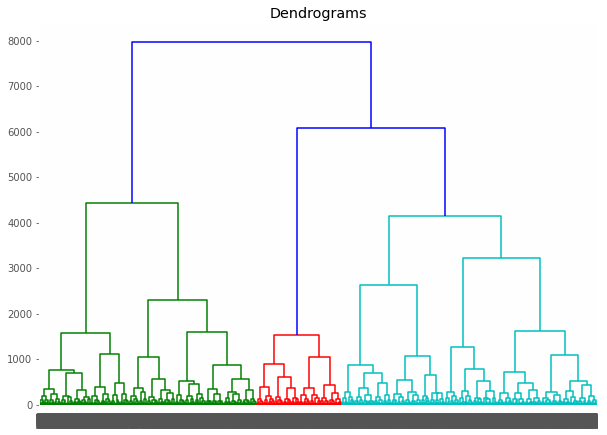

In [121]:
dendrogram_genetator(vec_df)

In [122]:
def dendrogram_genetator_with_thresold(df,thresold):
    plt.figure(figsize=(10, 7))
#     y=800
    plt.title("Dendrograms")  
    dend = shc.dendrogram(shc.linkage(df, method='ward'))
    plt.axhline(thresold, color='r', linestyle='--')
    

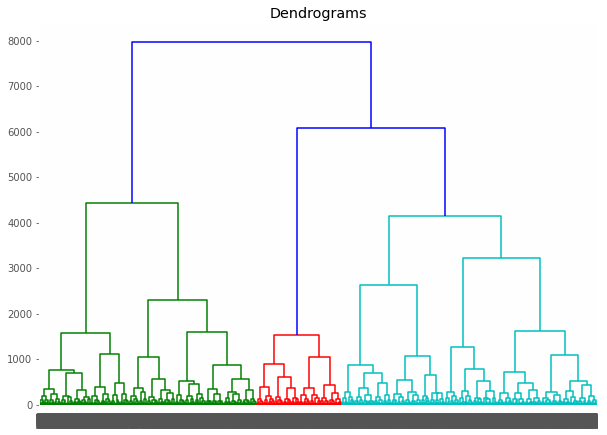

In [123]:
dendrogram_genetator_with_thresold(vec_df,40000)

In [124]:
def hierarchial_clustering(df):
    cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(df)
    
    plt.figure(figsize=(10, 7))  
    plt.scatter(df['ft1'], df['ft2'], c=cluster.labels_) 
    

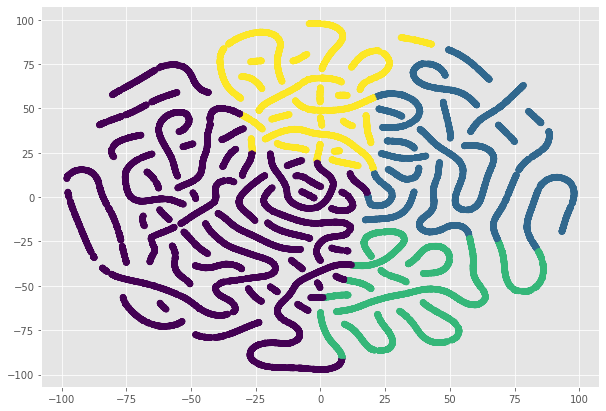

In [125]:
hierarchial_clustering(vec_df)

In [126]:
vec_df.set_index(cosine_df["cosine_similarity"], inplace = True) 
vec_df

ft1        ft2
cosine_similarity                      
0.146531           31.808632 -26.204569
0.287763          -76.515869 -28.145315
0.142557            4.494030 -39.052227
0.180155          -84.658371  41.187698
0.222998           61.019512 -60.409409
...                      ...        ...
0.169922           17.759716   3.288805
0.137534          -13.650416 -69.697556
0.149340           17.341867 -28.379580
0.078120          -73.893883  17.320261
0.139794          -12.239403 -55.493889

[22115 rows x 2 columns]

In [127]:
def cluster_element_extraction(vec_df):
    sns.set_palette('Set1', 10, 0.65)
    palette = (sns.color_palette())
    #set_link_color_palette(map(rgb2hex, palette))
    sns.set_style('white')
    
    np.random.seed(25)
    
    link = linkage(vec_df, metric='correlation', method='ward')

    figsize(8, 3)
    den = dendrogram(link, labels=vec_df.index)
    plt.xticks(rotation=90)
    no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
    sns.despine(**no_spine);

    plt.tight_layout()
    plt.savefig('feb2.png');
    
    cluster_idxs = defaultdict(list)
    for c, pi in zip(den['color_list'], den['icoord']):
        for leg in pi[1:3]:
            i = (leg - 5.0) / 10.0
            if abs(i - int(i)) < 1e-5:
                cluster_idxs[c].append(int(i))
                
    class Clusters(dict):
        def _repr_html_(self):
            html = '<table style="border: 0;">'
            for c in self:
                hx = rgb2hex(colorConverter.to_rgb(c))
                html += '<tr style="border: 0;">' \
                '<td style="background-color: {0}; ' \
                           'border: 0;">' \
                '<code style="background-color: {0};">'.format(hx)
                html += c + '</code></td>'
                html += '<td style="border: 0"><code>' 
                html += repr(self[c]) + '</code>'
                html += '</td></tr>'

            html += '</table>'

            return html
    
    cluster_classes = Clusters()
    for c, l in cluster_idxs.items():
        i_l = [den['ivl'][i] for i in l]
        cluster_classes[c] = i_l
        
    return cluster_classes
    

{'g': [0.13956882667488302,
  0.149524089738371,
  0.15727171478197133,
  0.21841813978036478,
  0.24733863228872613,
  0.10474497659503545,
  0.3298492795204059,
  0.1040890164154577,
  0.1524561960410144,
  0.29213027153822013,
  0.15932164010634947,
  0.12730549775688849,
  0.329277495556078,
  0.15766945526709675,
  0.24375107551655795,
  0.19301960074208308,
  -0.003127050274959773,
  0.14797187454397895,
  0.23711466929545216,
  0.15219920234632556,
  0.20650628238056665,
  0.2250748643567051,
  0.2430290068124973,
  0.2201397653141878,
  0.20515024129599746,
  0.21435749560522432,
  0.22886180858905297,
  0.24457367758745038,
  0.26559702095226145,
  0.1999975231923053,
  0.24212761014617398,
  0.19066362067354634,
  0.44796596402074734,
  0.33131976276620423,
  0.18902073935693783,
  0.006167893770928232,
  0.22288448544980935,
  0.2432372498601932,
  0.09428337594154756,
  0.22083054419058995,
  0.21709576565495706,
  0.13345885938175772,
  0.2006714660700618,
  0.2676674510742231,
  0.1968634945535083,
  0.2437296938237652,
  0.17322813864483294,
  0.1528939201993137,
  0.1602448519533091,
  0.25077504654816674,
  0.18925924401162117,
  0.2905388477362003,
  0.11363110051378622,
  0.11229156481477767,
  0.26556128121143896,
  0.24952343379300293,
  0.20227722542896315,
  0.13927966597223368,
  0.20256320809582723,
  0.1604611022565407,
  0.1472790280355642,
  0.29167365035248205,
  0.2525395428911168,
  0.16947717444547739,
  0.1302862890178235,
  0.1557148047076274,
  0.2687094851975669,
  0.019971107500521272,
  0.11450717241476671,
  0.12876964635489613,
  0.2026986485742212,
  0.21724461892004943,
  0.2046581328469158,
  0.10778699976307757,
  0.3097751553956106,
  0.14823764953260374,
  0.2023041560099876,
  0.10130581019397836,
  0.10737541392283975,
  0.22132823660710935,
  0.03450093577665232,
  0.13659370457865663,
  0.20678994642290138,
  0.25160050746715457,
  0.0078109200428644505,
  0.20113876188140695,
  0.24499554756603473,
  0.15546099852837925,
  0.22556122296568465,
  -0.011186184633951931,
  0.3262709233522627,
  0.24813166495509936,
  0.17111135327785376,
  0.2377698727879034,
  0.20138650859129648,
  0.2056915066779318,
  0.22773797215297636,
  0.20234060367238055,
  0.2658870338172985,
  0.3274012749811049,
  0.0990987531370547,
  0.15260490102520066,
  0.2733542816315464,
  0.16023334225133928,
  0.24674347389933043,
  0.0951546319289186,
  0.24505246199119962,
  0.20108702543434792,
  0.2161857189283987,
  0.2436951260702124,
  0.19661041879889682,
  0.15734420540547286,
  0.048666732359802685,
  0.1288156460523146,
  -0.0029735026560713286,
  0.25028075357553703,
  0.24202451891142202,
  0.11088740142667067,
  0.2518527720778915,
  0.19925321956107794,
  0.10144074340047801,
  0.04285634195342264,
  0.24540551442390177,
  0.15881010039219795,
  0.13624496200171016,
  0.24364702340049244,
  0.14867791830183452,
  0.2044110261181744,
  0.44714519735184927,
  0.2071153179532469,
  0.20566741414984074,
  0.1288829787767478,
  0.1499190971097886,
  0.18897380184837081,
  0.2256683260648483,
  -0.023624693314443578,
  0.21301545746332168,
  0.20281297939082987,
  0.29055708109037826,
  0.14873250686178285,
  0.10264603022101863,
  0.050099829969673264,
  0.217284084608235,
  0.19340313970005973,
  0.23049239633091106,
  0.27404175765458016,
  0.25155499822543653,
  0.1601869378387965,
  0.19987573063021719,
  0.2441423539663795,
  0.2377698727879034,
  0.2681204508054589,
  0.22301771879337742,
  0.22052411952719592,
  0.09380353021831564,
  0.22015273375718625,
  0.1884476561744205,
  0.24414075745877395,
  0.12599577941880813,
  0.1468075871450671,
  0.1721389688603182,
  0.143871214867619,
  0.1051916843509759,
  0.24830498854404787,
  0.22596953307068668,
  0.21532447882001082,
  0.1299519466892289,
  0.2159268863302985,
  0.1279847503815396,
  0.24393935799004177,
  0.45006043876708846,
  0.19298853693131596,
  0.2453777255170122,
  0.24962679284270972,
  0.19944993259624197,
  0.2298522367261

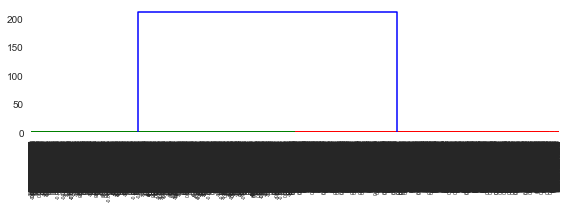

In [128]:
cluster_element_extraction(vec_df)

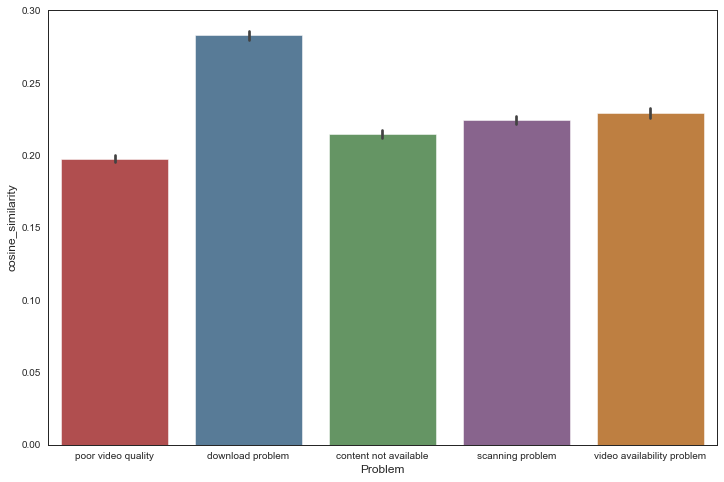

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (12,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'Problem', y = 'cosine_similarity', ax=ax, data=review_prob_score_df)

In [132]:
review_prob_score_df.to_csv ('/Users/tanyachauhan/Documents/review_problem_score.csv', index = False, header=True)
review_prob_score_df

Review Text                     Problem  cosine_similarity
0            best app students           poor video quality           0.146531
1            best app students             download problem           0.287763
2            best app students        content not available           0.142557
3            best app students             scanning problem           0.180155
4            best app students   video availability problem           0.222998
...                         ...                         ...                ...
22110  thank indian government           poor video quality           0.169922
22111  thank indian government             download problem           0.137534
22112  thank indian government        content not available           0.149340
22113  thank indian government             scanning problem           0.078120
22114  thank indian government   video availability problem           0.139794

[22115 rows x 3 columns]

In [133]:
#     return frame

In [ ]:
# vectorized_cosine_similarity_frame.index=cosine_list 

In [ ]:
# a_reset_df

In [ ]:
# final_a_frame=a_reset_df.drop(['level_0', 'index'], axis=1)
# final_a_frame

In [ ]:
# listOfADFRows = final_a_frame.to_numpy().tolist()
# listOfADFRows

In [ ]:
# listOfRDFRows= final_review_frame.to_numpy().tolist()
# listOfRDFRows

In [ ]:
# cosine_similarity(review_reset_df[0],a_reset_df[0])

In [138]:
# listOfADFRows[0]

In [ ]:
# k=cosine_similarity([listOfADFRows[0]],[listOfRDFRows[0]])
# k

In [ ]:
# k[0][0]

In [136]:
a=['poor video quality','download problem','content not available','scanning problem','video availability problem']
for i in range(len(a)):
    a[i]=a[i].lower()
a
type(a)

list

In [137]:
list_of_list=[processed_review_text,a]
list_of_list

[['best app students ',
  'app usefull students teachers ',
  'work mobile even android ',
  'good app secondary school teacher notice dixa smart work would like little contribute ',
  'good app lean ',
  'use book marathi gujarat l english language please ',
  'informative app load learn materials specially teachers want enhance knowledge ',
  'app great help learn mathsit extraordinary ',
  'app useful students ',
  'app helpful students teachers ',
  'useful learn every one ',
  'good aap understand much ',
  'cant able see video scan qr code many time video display ',
  'excellent app teachers students ',
  'try child st standard ssc board content fully available poetry songs app text book different interactive level require effective ',
  'studentcontent come sad ',
  'helfull teacher students ',
  'hi sir use old versions android mobile support please update ',
  'imp useful app ',
  'know reason content standard need ',
  'good interest helpful app free help teach lesson ',
  't

In [139]:
def unlisting_list_of_list(list_of_list):
    merged = list(itertools.chain(*list_of_list))
    review_ls= list(set(merged))
    return(review_ls)


In [144]:
# review_df_ls = list(final_df2["Review Text"])
# review_df_ls

['best app students ',
 'app usefull students teachers ',
 'work mobile even android ',
 'good app secondary school teacher notice dixa smart work would like little contribute ',
 'good app lean ',
 'use book marathi gujarat l english language please ',
 'informative app load learn materials specially teachers want enhance knowledge ',
 'app great help learn mathsit extraordinary ',
 'app useful students ',
 'app helpful students teachers ',
 'useful learn every one ',
 'good aap understand much ',
 'cant able see video scan qr code many time video display ',
 'excellent app teachers students ',
 'try child st standard ssc board content fully available poetry songs app text book different interactive level require effective ',
 'studentcontent come sad ',
 'helfull teacher students ',
 'hi sir use old versions android mobile support please update ',
 'imp useful app ',
 'know reason content standard need ',
 'good interest helpful app free help teach lesson ',
 'truly helpful better st

In [145]:
# def sentiment_score_count(review_df_ls):
#     sentiment_class = []
#     pos_score = []
#     neu_score = []
#     neg_score = []
#     for i in review_df_ls:
#         sid_obj = SentimentIntensityAnalyzer()  
#         sentiment_dict = sid_obj.polarity_scores(i)  
#         #print("Overall sentiment dictionary is : ", sentiment_dict) 
#         neg_score.append(sentiment_dict['pos']) 
#         neu_score.append(sentiment_dict['neg']) 
#         pos_score.append(sentiment_dict['neu'])
#         if sentiment_dict['compound'] >= 0.05 : 
#             sentiment_class.append("Positive") 

#         elif sentiment_dict['compound'] <= -0.05 : 
#             sentiment_class.append("Negative") 

#         else : 
#             sentiment_class.append("Neutral")
            
#     sentiment_df = pd.DataFrame(list(zip(neg_score, neu_score, pos_score, sentiment_class )), 
#                columns =['pos_score','neg_score','neu_score','sentiment_class']) 
#     return sentiment_df 

In [146]:
# sentiment_df = sentiment_score_count(review_df_ls)
# sentiment_df

pos_score  neg_score  neu_score sentiment_class
0         0.677      0.000      0.323        Positive
1         0.000      0.000      1.000         Neutral
2         0.000      0.000      1.000         Neutral
3         0.448      0.000      0.552        Positive
4         0.592      0.000      0.408        Positive
...         ...        ...        ...             ...
4418      0.649      0.000      0.351        Positive
4419      0.000      0.000      1.000         Neutral
4420      0.492      0.000      0.508        Positive
4421      0.351      0.201      0.448        Positive
4422      0.556      0.000      0.444        Positive

[4423 rows x 4 columns]

In [153]:
# # joining two dataframes
# joined_df = final_df2.join(sentiment_df) 
# joined_df

In [154]:
# eng_df.sort_values("Review Submit Date and Time", axis = 0, ascending = True, 
#                  inplace = True, na_position ='first') 
  
# eng_df
# list_of_date = eng_df['Review Submit Date and Time'].to_list()
# # print(list_of_date)
# list_year_month=[]
# for i in list_of_date:
#     list_year_month.append(i[:7])
# print(list_year_month)
    

In [155]:
# selected_col = eng_df[['Review Submit Date and Time']].copy()
# selected_col
# selected_col=pd.DataFrame(list_year_month,columns = ["Review Submit Date and Time"]) 
# selected_col



In [156]:
# final_df = joined_df.join(selected_col) 
# final_df

In [157]:
# def polarity_and_subjectivity(review_df_ls):
#     # List of sentiments of each review text
#     sentiments = []

#     for i in review_df_ls:
#         blob = TextBlob(i)
#         s = blob.sentiment
#         sentiments.append(s)
    
#     # Creating a dataframe of sentiments
#     sentiment = pd.DataFrame(sentiments)
#     return sentiment

In [158]:
# sentiment = polarity_and_subjectivity(review_df_ls)
# sentiment

In [159]:
# final_df2 = final_df.join(sentiment) 
# final_df2[51:100]

In [160]:
# final_df2.drop(["Keywords"],axis = 1,inplace = True) 
  
# # display 
# final_df2 

In [161]:
# pos = final_df2.loc[final_df2['sentiment_class']=='Positive']
# pos_df = pd.DataFrame(pos)
# pos_df[0:50]


In [162]:
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')
# import re

# def leaves(tree):
#     """Finds NP (nounphrase) leaf nodes of a chunk tree."""
#     for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
#        # The yield statement suspends function’s execution and sends a value back to the caller.
#         yield subtree.leaves()

# def acceptable_word(word):
#     """Checks conditions for acceptable word: length, stopword."""
#     accepted = bool(2 <= len(word) <= 40
#                     and word.lower() not in stopwords)
#     return accepted

# def get_terms(tree):

#     for leaf in leaves(tree):
#         term = [ w for w,t in leaf if acceptable_word(w) ]
#         yield term


In [163]:
# grammar =r"""
#   NP: {<DT|JJ|NN.*>+}          
#   PP: {<IN><NP>}            
#   VP: {<VB.*><NP|PP|CLAUSE>+$}
#   CLAUSE: {<NP><VP>}          
#   """
      
    

In [164]:
# def phrase_extraction(text, grammar):
#     text = text.lower()
#     sentence_re = r'''(?x)          
#       (?:[A-Z]\.)+        
#     | \w+(?:-\w+)*        
#     | \$?\d+(?:\.\d+)?%?  
#     | \.\.\.              
#     | [][.,;"'?():_`-]    
#     '''
    
#     ls = [] 
#     word_token_ls = text.split(" ")

#     toks = nltk.regexp_tokenize(text, sentence_re)
#     postoks = nltk.tag.pos_tag(toks)
    
#     chunker = nltk.RegexpParser(grammar)
    
#     tree = chunker.parse(postoks)
#     terms = get_terms(tree)
#     for term in terms:
#         ls.append(" ".join(term)) 
#     return list(set(ls))



In [165]:
# list_pos_review= list(pos_df["Review Text"])
# list_pos_review

In [166]:
# def vectorization_of_list(positive_review):
#     #word embedding(vectorization)
#     embed = hub.Module("/Users/tanyachauhan/Downloads/3")
#     tf.logging.set_verbosity(tf.logging.ERROR)
#     with tf.Session() as session:
#         session.run([tf.global_variables_initializer(), tf.tables_initializer()])
#         message_embeddings = session.run(embed(positive_review))
# #         print(message_embeddings)
#         lst = []
#         for i in message_embeddings:
#             df = pd.DataFrame([i])
#             lst.append(df)
#     frame = pd.concat(lst)
#     return frame

In [167]:
# frame = vectorization_of_list(list_pos_review)
# frame

In [168]:
# new_pos_df = pd.DataFrame(columns=['Review Text', 'Keywords'])

# for i in list_pos_review:
#     if(i == ''):
#         new_pos_df = new_pos_df.append({'Review Text': i, 'Keywords': '[]'}, ignore_index=True)
#     else:
#         x = phrase_extraction(i, grammar)
#         new_pos_df = new_pos_df.append({'Review Text': i, 'Keywords': x}, ignore_index=True)

# new_pos_df[0:50]
    

In [169]:
# pos_l=list(new_pos_df["Keywords"])
# pos_l


In [170]:
# list_pos_df=pd.DataFrame(pos_l)
# pos_count=list_pos_df[0].value_counts()
# pos_count[0:50]

In [171]:
# import re
# my_pos_list=list_pos_df[0].tolist()
# my_pos_list
# new_pos_list = [y.lower() for y in list_pos_review if re.search('exlent', y)]
# new_pos_list


In [172]:
# neg = final_df2.loc[final_df2['sentiment_class']=='Negative']
# neg_df = pd.DataFrame(neg)
# neg_df[0:50]



In [173]:
# from nltk.corpus import stopwords
# stopwords = stopwords.words('english')
# import re

# def leaves(tree):
#     """Finds NP (nounphrase) leaf nodes of a chunk tree."""
#     for subtree in tree.subtrees(filter = lambda t: t.label()=='NP'):
#        # The yield statement suspends function’s execution and sends a value back to the caller.
#         yield subtree.leaves()

# def acceptable_word(word):
#     """Checks conditions for acceptable word: length, stopword."""
#     accepted = bool(2 <= len(word) <= 40
#                     and word.lower() not in stopwords)
#     return accepted

# def get_terms(tree):

#     for leaf in leaves(tree):
#         term = [ w for w,t in leaf if acceptable_word(w) ]
#         yield term


In [174]:
# grammar =r"""
#   NP: {<DT|JJ|NN.*>+}          
#   PP: {<IN><NP>}            
#   VP: {<VB.*><NP|PP|CLAUSE>+$}
#   CLAUSE: {<NP><VP>}          
#   """
      
    

In [175]:
# def phrase_extraction(text, grammar):
#     text = text.lower()
#     sentence_re = r'''(?x)          
#       (?:[A-Z]\.)+        
#     | \w+(?:-\w+)*        
#     | \$?\d+(?:\.\d+)?%?  
#     | \.\.\.              
#     | [][.,;"'?():_`-]    
#     '''
    
#     ls = [] 
#     word_token_ls = text.split(" ")

#     toks = nltk.regexp_tokenize(text, sentence_re)
#     postoks = nltk.tag.pos_tag(toks)
    
#     chunker = nltk.RegexpParser(grammar)
    
#     tree = chunker.parse(postoks)
#     terms = get_terms(tree)
#     for term in terms:
#         ls.append(" ".join(term)) 
#     return list(set(ls))



In [176]:
# list_neg_review= list(neg_df["Review Text"])
# list_neg_review

In [177]:
# def vectorization_of_list(negative_review):
#     #word embedding(vectorization)
#     embed = hub.Module("/Users/tanyachauhan/Downloads/3")
#     tf.logging.set_verbosity(tf.logging.ERROR)
#     with tf.Session() as session:
#         session.run([tf.global_variables_initializer(), tf.tables_initializer()])
#         message_embeddings = session.run(embed(negative_review))
# #         print(message_embeddings)
#         lst = []
#         for i in message_embeddings:
#             df = pd.DataFrame([i])
#             lst.append(df)
#     frame = pd.concat(lst)
#     return frame

In [178]:
# frame = vectorization_of_list(list_neg_review)
# frame

In [179]:
# negative_review_text_df = pd.DataFrame(list_neg_review,columns=['Review Text'])
# negative_review_text_df

In [180]:
# frame.set_index(negative_review_text_df["Review Text"], inplace = True) 


In [181]:
# frame

In [182]:
# def TSNE_3D(df):
#     %pylab inline 

#     #Reduce Dimensinality
#     X_embedded = TSNE(n_components=3).fit_transform(df)
#     vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2","ft3"])
#     #vec_df
#     #plot 3-D graph
#     fig = px.scatter_3d(vec_df,x="ft1",y="ft2",z="ft3")
#     fig.show()

In [183]:
# TSNE_3D(frame)

In [184]:
# def dendrogram_genetator(df):
#     plt.figure(figsize=(10, 7))  
#     plt.title("Dendrograms")  
#     dend = shc.dendrogram(shc.linkage(df, method='ward'))
    

In [185]:
# frame

In [186]:
# %pylab inline
# #Reduce Dimensinality
# X_embedded = TSNE(n_components=3).fit_transform(frame)
# vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2","ft3"])
# vec_df

In [187]:
# dendrogram_genetator(vec_df)

In [188]:
# def dendrogram_genetator_with_thresold(df,thresold):
#     plt.figure(figsize=(10, 7))
# #     y=800
#     plt.title("Dendrograms")  
#     dend = shc.dendrogram(shc.linkage(df, method='ward'))
#     plt.axhline(thresold, color='r', linestyle='--')
    


In [189]:
# dendrogram_genetator_with_thresold(vec_df,850)

In [190]:
# def hierarchial_clustering(df):
#     cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
#     cluster.fit_predict(df)
    
#     plt.figure(figsize=(10, 7))  
#     plt.scatter(df['ft1'], df['ft2'], c=cluster.labels_) 
    

In [191]:
# hierarchial_clustering(vec_df)

In [192]:
# vec_df.set_index(negative_review_text_df["Review Text"], inplace = True) 
# vec_df

In [193]:
# def cluster_element_extraction(vec_df):
#     sns.set_palette('Set1', 10, 0.65)
#     palette = (sns.color_palette())
#     #set_link_color_palette(map(rgb2hex, palette))
#     sns.set_style('white')
    
#     np.random.seed(25)
    
#     link = linkage(vec_df, metric='correlation', method='ward')

#     figsize(8, 3)
#     den = dendrogram(link, labels=vec_df.index)
#     plt.xticks(rotation=90)
#     no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
#     sns.despine(**no_spine);

#     plt.tight_layout()
#     plt.savefig('feb2.png');
    
#     cluster_idxs = defaultdict(list)
#     for c, pi in zip(den['color_list'], den['icoord']):
#         for leg in pi[1:3]:
#             i = (leg - 5.0) / 10.0
#             if abs(i - int(i)) < 1e-5:
#                 cluster_idxs[c].append(int(i))
                
#     class Clusters(dict):
#         def _repr_html_(self):
#             html = '<table style="border: 0;">'
#             for c in self:
#                 hx = rgb2hex(colorConverter.to_rgb(c))
#                 html += '<tr style="border: 0;">' \
#                 '<td style="background-color: {0}; ' \
#                            'border: 0;">' \
#                 '<code style="background-color: {0};">'.format(hx)
#                 html += c + '</code></td>'
#                 html += '<td style="border: 0"><code>' 
#                 html += repr(self[c]) + '</code>'
#                 html += '</td></tr>'

#             html += '</table>'

#             return html
    
#     cluster_classes = Clusters()
#     for c, l in cluster_idxs.items():
#         i_l = [den['ivl'][i] for i in l]
#         cluster_classes[c] = i_l
        
#     return cluster_classes
    

In [194]:
# cluster_element_extraction(vec_df.head(3213))

In [195]:
# new_neg_df = pd.DataFrame(columns=['Review Text', 'Keywords'])

# for i in list_neg_review:
#     if(i == ''):
#         new_neg_df = new_neg_df.append({'Review Text': i, 'Keywords': '[]'}, ignore_index=True)
#     else:
#         x = phrase_extraction(i, grammar)
#         new_neg_df = new_neg_df.append({'Review Text': i, 'Keywords': x}, ignore_index=True)

# new_neg_df[0:50]
    

In [196]:
# neg_l=list(new_neg_df["Keywords"])
# neg_l


In [197]:
# list_neg_df=pd.DataFrame(neg_l)
# neg_count=list_neg_df[0].value_counts()
# neg_count[0:50]

In [198]:
# import re
# my_neg_list=list_neg_df[0].tolist()
# my_neg_list
# new_neg_list = [y.lower() for y in list_neg_review if re.search('material', y)]
# new_neg_list


In [199]:
# # event_dictionary ={'Positive' : >0.5, 'Neutral' : 0.5, 'Negative' : <0.5} 
  
# # # Add a new column named 'Price' 
# # final_df2['polarity'] = final_df2['sentiment_class'].map(event_dictionary) 
  
# # # Print the DataFrame 
# # print(final_df2)

# final_df2["sentiment_class"].value_counts()



In [200]:
# final_df2["polarity"].value_counts()
# final_df2['polarity'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

# final_df2["polarity"].describe()


In [201]:
# final_df2["sentiment_class"].describe()


In [202]:
# final_df2["Review Text"]=["Review Text"].str.lower()

# final_df2



In [203]:
# a=final_df2["Review Text"].value_counts()
# a[0:50]

In [204]:
# final_df2["Review Text"].describe()


In [205]:
# mylist=final_df2["Review Text"].tolist()


In [206]:
# out = map(lambda x:x.lower(), mylist)
# output = list(out)
# output
 

In [207]:
# # a=final_df2["Review Text"].value_counts()
# # a[0:50]

# lowerdata=pd.DataFrame(output)
# lowerdata[0].value_counts()

In [208]:
# import re
# my_list=lowerdata[0].tolist()
# new_list = [x.lower() for x in mylist if re.search("problems", x)]
# new_list


In [209]:
# def CountFrequency(new_list): 
  
#     # Creating an empty dictionary  
#     freq = {} 
#     for item in new_list: 
#         if (item in freq): 
#             freq[item] += 1
#         else: 
#             freq[item] = 1
  
#     for key, value in freq.items(): 
#         print(key,":", value) 
# CountFrequency(new_list) 

In [210]:
# final_df2.to_csv('/Users/tanyachauhan/Documents/Diksha_Sentiments_Analysis.csv', index = False, header=True)
# final_df2

In [211]:
# reviewdf = final_df["Keywords"]
# reviewdf


In [212]:
# def wordcloud_generator(reviewdf):
#     comment_words = ' '
#     stopwords = set(STOPWORDS) 
#     for val in reviewdf: 
#         val = str(val) 

#         # split the value 
#         tokens = val.split() 

#         # Converts each token into lowercase 
#         for i in range(len(tokens)): 
#             tokens[i] = tokens[i].lower() 

#         for words in tokens: 
#             comment_words = comment_words + words + ' '

#     wordcloud = WordCloud(width = 800, height = 800, 
#     background_color = 'white', 
#     stopwords = stopwords, 
#     min_font_size = 10).generate(comment_words) 

#     plt.figure(figsize = (8, 8), facecolor = None) 
#     plt.imshow(wordcloud) 
#     plt.axis("off") 
#     plt.tight_layout(pad = 0) 

#     plt.show()
    

In [213]:
# wordcloud_generator(reviewdf)

In [214]:
# def sentiment_graph_for_each_rating(df):
#     g = sns.FacetGrid(df, col = "sentiment_class")
#     g.map(plt.hist, "Star Rating")
#     plt.show()

In [215]:
# sentiment_graph_for_each_rating(final_df2)

In [216]:
# def vectorization_of_list(keyword_list):
#     #word embedding(vectorization)
#     embed = hub.Module("/Users/rishabhsrivastava/Downloads/vectorization_trained_dataset/")
#     tf.logging.set_verbosity(tf.logging.ERROR)
#     with tf.Session() as session:
#         session.run([tf.global_variables_initializer(), tf.tables_initializer()])
#         message_embeddings = session.run(embed(keyword_list))
# #         print(message_embeddings)
#         lst = []
#         for i in message_embeddings:
#             df = pd.DataFrame([i])
#             lst.append(df)
#     frame = pd.concat(lst)
#     return frame


In [217]:
# frame = vectorization_of_list(kywrd_ls)
# frame

In [218]:
# review_frame = vectorization_of_list(review_df_ls)
# review_frame

In [219]:
# review_text_df = pd.DataFrame(review_df_ls,columns=['Review Text'])
# review_text_df

In [220]:
# review_frame.set_index(review_text_df["Review Text"], inplace = True) 


In [221]:
# review_frame

In [222]:
# keywordsdf = pd.DataFrame(kywrd_ls,columns=['keywords'])
# keywordsdf

In [223]:
# frame.set_index(keywordsdf["keywords"], inplace = True) 
# frame

In [224]:
# def TSNE_3D(df):
#     %pylab inline 

#     #Reduce Dimensinality
#     X_embedded = TSNE(n_components=3).fit_transform(df)
#     vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2","ft3"])
#     #vec_df
#     #plot 3-D graph
#     fig = px.scatter_3d(vec_df,x="ft1",y="ft2",z="ft3")
#     fig.show()

In [225]:
# TSNE_3D(frame)

In [226]:
# TSNE_3D(review_frame)

In [227]:
# frame.insert(512,"keywords",frame.index)
# frame.reset_index(drop=True, inplace=True)

In [228]:
# frame["keywords"]

In [229]:
# def dendrogram_genetator(df):
#     plt.figure(figsize=(10, 7))  
#     plt.title("Dendrograms")  
#     dend = shc.dendrogram(shc.linkage(df, method='ward'))
    

In [230]:
# frame

In [231]:
# %pylab inline
# #Reduce Dimensinality
# X_embedded = TSNE(n_components=3).fit_transform(frame)
# vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2","ft3"])
# vec_df

In [232]:
# %pylab inline
# #Reduce Dimensinality
# X_embedded = TSNE(n_components=3).fit_transform(review_frame)
# review_vec_df = pd.DataFrame(X_embedded, columns=["ft1","ft2","ft3"])
# review_vec_df

In [233]:
# dendrogram_genetator(vec_df)

In [234]:
# dendrogram_genetator(review_vec_df)

In [235]:
# def dendrogram_genetator_with_thresold(df,thresold):
#     plt.figure(figsize=(10, 7))
# #     y=800
#     plt.title("Dendrograms")  
#     dend = shc.dendrogram(shc.linkage(df, method='ward'))
#     plt.axhline(thresold, color='r', linestyle='--')
    


In [236]:
# dendrogram_genetator_with_thresold(vec_df,800)

In [237]:
# dendrogram_genetator_with_thresold(review_vec_df,1100)

In [238]:
# def hierarchial_clustering(df):
#     cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
#     cluster.fit_predict(df)
    
#     plt.figure(figsize=(10, 7))  
#     plt.scatter(df['ft1'], df['ft2'], c=cluster.labels_) 
    

In [239]:
# hierarchial_clustering(vec_df)

In [240]:
# hierarchial_clustering(review_vec_df)

In [241]:
#result.reset_index(drop=True, inplace=True)
# vec_df.set_index(keywordsdf["keywords"], inplace = True) 
# vec_df

In [242]:
# #result.reset_index(drop=True, inplace=True)
# review_vec_df.set_index(review_text_df["Review Text"], inplace = True) 
# review_vec_df

In [243]:
# def cluster_element_extraction(vec_df):
#     sns.set_palette('Set1', 10, 0.65)
#     palette = (sns.color_palette())
#     #set_link_color_palette(map(rgb2hex, palette))
#     sns.set_style('white')
    
#     np.random.seed(25)
    
#     link = linkage(vec_df, metric='correlation', method='ward')

#     figsize(8, 3)
#     den = dendrogram(link, labels=vec_df.index)
#     plt.xticks(rotation=90)
#     no_spine = {'left': True, 'bottom': True, 'right': True, 'top': True}
#     sns.despine(**no_spine);

#     plt.tight_layout()
#     plt.savefig('feb2.png');
    
#     cluster_idxs = defaultdict(list)
#     for c, pi in zip(den['color_list'], den['icoord']):
#         for leg in pi[1:3]:
#             i = (leg - 5.0) / 10.0
#             if abs(i - int(i)) < 1e-5:
#                 cluster_idxs[c].append(int(i))
                
#     class Clusters(dict):
#         def _repr_html_(self):
#             html = '<table style="border: 0;">'
#             for c in self:
#                 hx = rgb2hex(colorConverter.to_rgb(c))
#                 html += '<tr style="border: 0;">' \
#                 '<td style="background-color: {0}; ' \
#                            'border: 0;">' \
#                 '<code style="background-color: {0};">'.format(hx)
#                 html += c + '</code></td>'
#                 html += '<td style="border: 0"><code>' 
#                 html += repr(self[c]) + '</code>'
#                 html += '</td></tr>'

#             html += '</table>'

#             return html
    
#     cluster_classes = Clusters()
#     for c, l in cluster_idxs.items():
#         i_l = [den['ivl'][i] for i in l]
#         cluster_classes[c] = i_l
        
#     return cluster_classes
    

In [244]:
# cluster_element_extraction(vec_df)

In [245]:
# cluster_element_extraction(review_vec_df.head(3213))

In [246]:
# cluster_element_extraction(review_vec_df[3215:])

In [247]:
# review_vec_df.head(3214)

In [248]:
# vec_df

In [249]:
# new_df

In [250]:

# listoflist = new_df['Keywords'].tolist()


In [251]:
# def list_of_lists_to_list(list_of_list):
#     keyword_list = []
#     kywrd_freq_list = []
#     for i in list_of_list:
#         kywrd_freq_list.append(len(i))
#         for j in i:
#             keyword_list.append(j)

#     return keyword_list, kywrd_freq_list

In [252]:
# keyword_list, kywrd_freq_list = list_of_lists_to_list(listoflist)


In [253]:
# list_df = pd.DataFrame(keyword_list,columns =['Keywords']) 
# list_df

In [254]:
# rating_list = new_df['Star Rating'].tolist()
# len(rating_list)

In [255]:
# kywrd_rating_list =[]
# for i in range(len(rating_list)):
#     for j in range(len(kywrd_freq_list)):
#         if(i==j):
#             kywrd_rating_list.extend(repeat(rating_list[i],kywrd_freq_list[j]))

        

In [256]:
# rate_df = pd.DataFrame(kywrd_rating_list,columns =['Star Rating']) 
# rate_df

In [257]:
# key_rate_df = list_df.join(rate_df)
# key_rate_df

In [258]:
# def clustering_rating_wise(key_rate_df, rating):
#     key_data = key_rate_df.loc[key_rate_df['Star Rating'] == rating]
#     key_rate_df1 = pd.DataFrame(key_data)
# #     return key_rate_df1
#     ky_ls =key_rate_df1['Keywords'].tolist()
    
#     frame = vectorization_of_list(ky_ls)
#     frame.set_index(key_rate_df1["Keywords"], inplace = True) 
#     return cluster_element_extraction(frame)



In [259]:
# clustering_rating_wise(key_rate_df, 5)


In [260]:
# key_rate_df["Keywords"].value_counts()[:50]



In [261]:
# eng_df

In [262]:
# required_cols = eng_df[['Review Text','Star Rating']]
# required_cols

In [263]:
# def clustering_rating_wise(key_rate_df, rating):
#     key_data = key_rate_df.loc[key_rate_df['Star Rating'] == rating]
#     key_rate_df1 = pd.DataFrame(key_data)
# #     return key_rate_df1
#     ky_ls =key_rate_df1['Review Text'].tolist()
    
#     frame = vectorization_of_list(ky_ls)
#     frame.set_index(key_rate_df1["Review Text"], inplace = True) 
#     return cluster_element_extraction(frame)

In [264]:
# clustering_rating_wise(required_cols, 5)
